In [460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [461]:
dataset = pd.read_csv('FootballPlayer_Salary_Prediction.csv')
dataset.head()

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,"46,427,000",23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,"42,125,000",30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,"34,821,000",35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,"19,959,000",31,R. Madrid,La Liga,BEL,Forward,443,120
4,"19,500,000",31,Man UFC,Premier League,ESP,Goalkeeper,480,45


In [462]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Wage      3907 non-null   object
 1   Age       3907 non-null   int64 
 2   Club      3907 non-null   object
 3   League    3907 non-null   object
 4   Nation    3907 non-null   object
 5   Position  3907 non-null   object
 6   Apps      3907 non-null   int64 
 7   Caps      3907 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 244.3+ KB


,Age,Apps,Caps
count,3907.000000,3907.000000,3907.000000
mean,24.120553,140.057077,8.926542
std,4.935638,131.694425,20.518234
min,18.000000,0.000000,0.000000
25%,20.000000,15.000000,0.000000
50%,24.000000,115.000000,0.000000
75%,28.000000,224.500000,6.000000
max,41.000000,715.000000,180.000000


In [463]:
dataset.columns

Index(['Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'], dtype='object')

In [464]:
dataset.shape

(3907, 8)

In [465]:
dataset.isna().sum()

Wage        0
Age         0
Club        0
League      0
Nation      0
Position    0
Apps        0
Caps        0
dtype: int64

In [466]:
dataset.duplicated().sum()

65

In [467]:
dataset = dataset.drop_duplicates()
dataset.duplicated().sum()

0

In [468]:
dataset.head(2)

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,"46,427,000",23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,"42,125,000",30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119


In [469]:
sns.set(style='darkgrid')

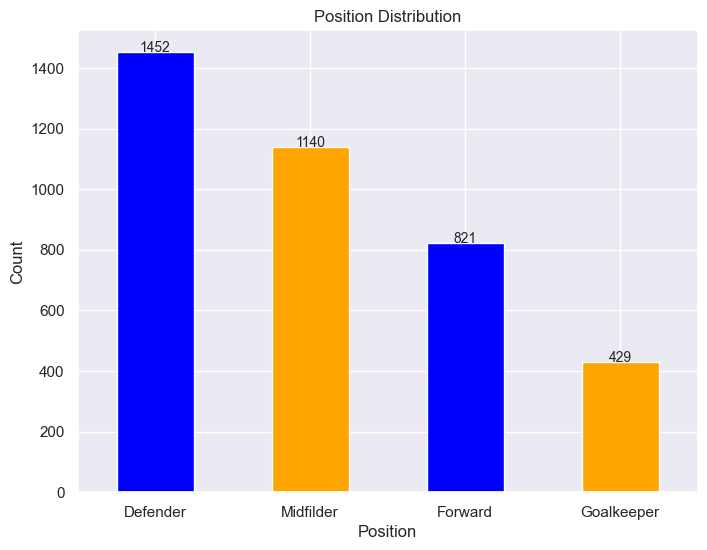

In [470]:
counts = dataset['Position'].value_counts().sort_values(ascending=False)

ax = counts.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 6))
for i, v in enumerate(counts):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)

plt.title('Position Distribution')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

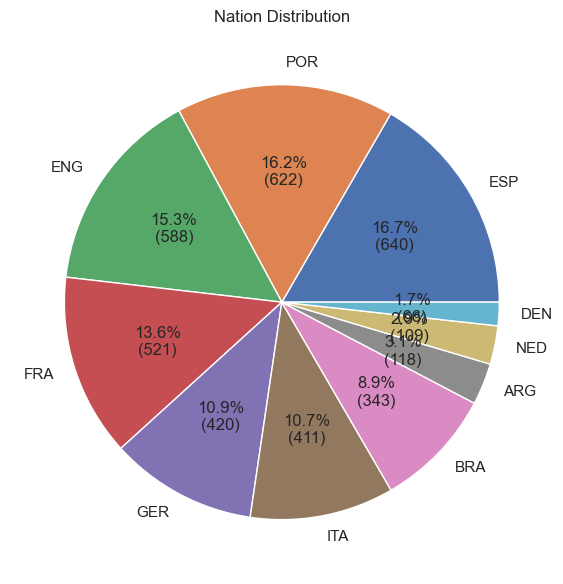

In [471]:
dataset['Nation'].value_counts().sort_values(ascending=False).head(10).plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%\n({int(p*dataset.shape[0]/100)})', 
    figsize=(6,6)
)
plt.title('Nation Distribution')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

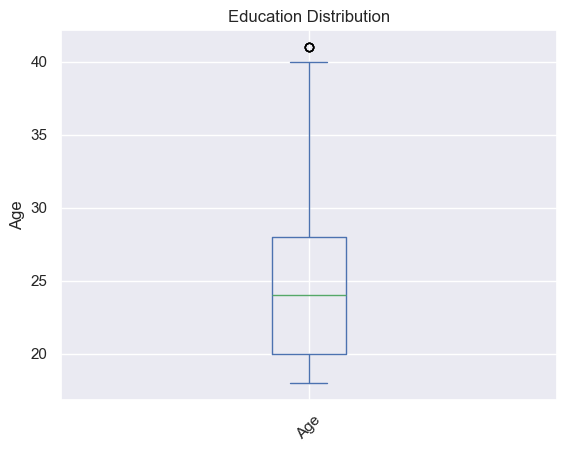

In [472]:
dataset['Age'].plot(kind='box')
plt.title('Education Distribution')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

In [473]:
dataset['Wage'] = dataset['Wage'].replace('[\€,Kk]', '', regex=True)  # remove € and K
dataset['Wage'] = dataset['Wage'].replace('M', '000000', regex=True)  # if it has millions
dataset['Wage'] = dataset['Wage'].replace('k', '000', regex=True)     # if it has k
dataset['Wage'] = dataset['Wage'].astype(int)

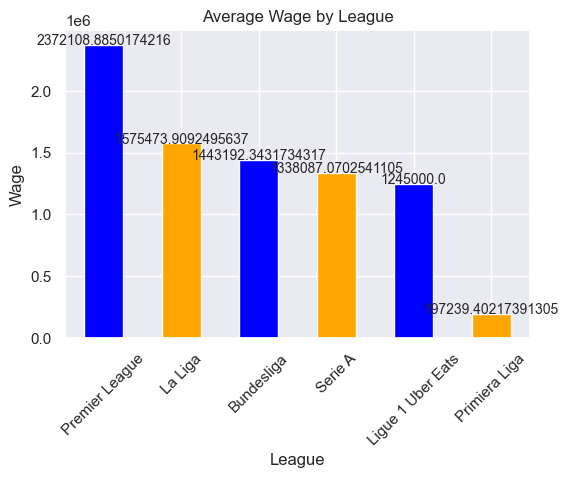

In [474]:
counts = dataset.groupby('League')['Wage'].mean().sort_values(ascending=False)

ax = counts.plot(kind='bar', color=['blue', 'orange'], figsize=(6, 4))
for i, v in enumerate(counts):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)

plt.title('Average Wage by League')
plt.xlabel('League')
plt.ylabel('Wage')
plt.xticks(rotation=45)
plt.show()

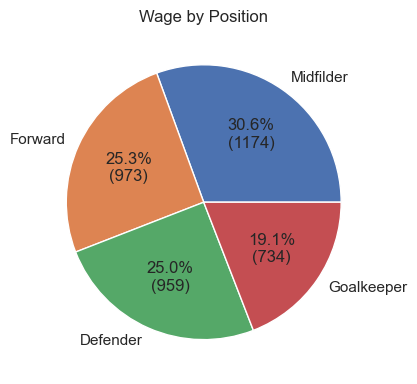

In [475]:
dataset.groupby('Position')['Wage'].mean().sort_values(ascending=False).plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%\n({int(p*dataset.shape[0]/100)})', 
    figsize=(6,4)
)
plt.title('Wage by Position')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [476]:
dataset.head(3)

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,46427000,23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,42125000,30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,34821000,35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162


In [477]:
dataset = dataset[['Age', 'Club', 'League', 'Position', 'Wage']]
dataset.head()

,Age,Club,League,Position,Wage
0,23,PSG,Ligue 1 Uber Eats,Forward,46427000
1,30,PSG,Ligue 1 Uber Eats,Midfilder,42125000
2,35,PSG,Ligue 1 Uber Eats,Forward,34821000
3,31,R. Madrid,La Liga,Forward,19959000
4,31,Man UFC,Premier League,Goalkeeper,19500000


In [478]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat_col = dataset[['Club', 'League', 'Position']]

for col in cat_col:
    dataset[col] = encoder.fit_transform(dataset[col])

dataset.head(2)

,Age,Club,League,Position,Wage
0,23,73,2,1,46427000
1,30,73,2,3,42125000


In [479]:
corr = dataset.corr()
corr

,Age,Club,League,Position,Wage
Age,1.000000,-0.011996,-0.098646,0.004802,0.311789
Club,-0.011996,1.000000,-0.016530,-0.019585,-0.046083
League,-0.098646,-0.016530,1.000000,-0.015045,-0.070605
Position,0.004802,-0.019585,-0.015045,1.000000,0.037690
Wage,0.311789,-0.046083,-0.070605,0.037690,1.000000


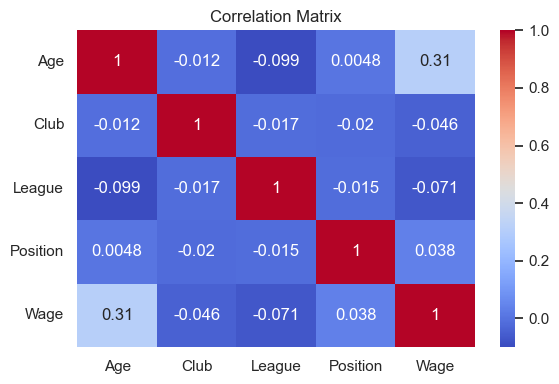

In [480]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [481]:
x = dataset.drop(['Wage'], axis = 1)
y = dataset['Wage']
x
y

0       46427000
1       42125000
2       34821000
3       19959000
4       19500000
          ...   
3902        3400
3903        3200
3904        2900
3905        2700
3906        1400
Name: Wage, Length: 3842, dtype: int32

In [482]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [483]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor(random_state=42)
dtr_model.fit(x_train, y_train)

y_pred = dtr_model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))
print('\n\n')

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 1045598.385348938
RMSE: 5343920771463.752
R2: 0.36413435442519504



MAE: 1388445.19471749
RMSE: 7601761193596.997
R2: 0.09547708590970405


In [484]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

rfr_model = RandomForestRegressor(n_estimators=200, random_state=42)
rfr_model.fit(x_train, y_train)

y_pred = rfr_model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 859341.8227567567
RMSE: 4091281863992.266
R2: 0.5131841030338935


In [485]:
y_pred = rfr_model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.to_numpy().reshape(len(y_test), 1)), axis=1))

[[ 754143.95833333  217000.        ]
 [  71628.75         65500.        ]
 [1596670.35714286  552000.        ]
 ...
 [2518943.71428571 1032000.        ]
 [4349636.47619047 3877000.        ]
 [ 510205.53571429  287000.        ]]


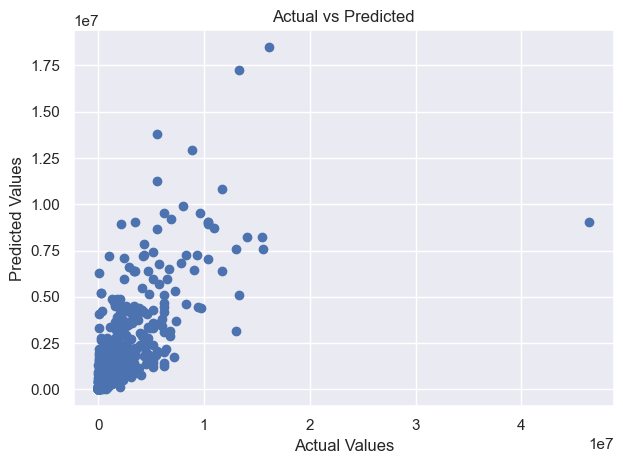

In [486]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

In [487]:
x.sample(5)

,Age,Club,League,Position
3892,18,95,4,2
3646,19,90,5,3
2738,19,98,3,1
3405,18,52,0,0
2235,26,100,2,3


In [491]:
y.iloc[2235]

254000

In [492]:
user_input = [[26, 100, 2, 3]]
results = dtr_model.predict(user_input)[0]
print(f"Accuracy: {results:.2f}")

Accuracy: 802000.00
